- Building Square Footage – Total building area as reported in PM
- Building Age – Age of building based on year built from PLUTO database (new variable)
- Number of Floors – Total number of floors in building from PLUTO database
- FAR – As-built floor area ratio from PLUTO database
- Lot Coverage – building footprint divided by lot area from PLUTO database. Building footprint approximated by multiplying building width by building depth (new variable)
- Lot Location – a binary variable for whether the building is an inside lot or corner lot (based on variable from the PLUTO database)
- Detached Building - a binary variable for whether the building is detached or attached to adjacent buildings (based on variable from the PLUTO database)
- Primary Energy Source – a binary variable equal to 1 for the dominant fuel type in the building, and equal to 0 otherwise (new variable)
- % non-Primary Space Type – percentage of non-primary space type (e.g. percentage of retail in a building with a majority office space) (new variable)

For Office buildings, the following variables are added to the base model:
- Office Worker Density – Number of employees per 1,000 square feet (default value = 2.3)
- Office Weekly Operating Hours – number of hours per week that a building is occupied by at least 75% of the tenant employees (default value = 65 hours per week)
- Floor Plate Size – estimate of average floor plate size (new variable)

For Multi-Family buildings, the following variables are added to the base model: Affordable or Market Rate – a binary variable equal to 1 if all units in building are affordable, and equal to 0 if market-rate (new variable); note that “affordable” is used here according to the EPA Portfolio 
- Manager definition, which includes subsidized housing intended for low-income households.
- Number of Laundry Facilities per Unit – total number of laundry facilities for each residential unit
- Number of Dishwashers per Unit – total number of dishwashers for each residential unit Percent Cooled – percent of gross floor space that is air conditioned
- Average Unit Size = estimate of the average gross floor area per unit (new variable)

In [830]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [831]:
# load data
ll84_all_2021 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2022__Data_for_Calendar_Year_2021_.csv', na_values='')
ll84_all_2020 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv', na_values='')
ll84_all_2019 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2020__Data_for_Calendar_Year_2019_.csv', na_values='')
ll84_all_2018 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2019__Data_for_Calendar_Year_2018_.csv', na_values='')
ll84_all_2017 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2018__Data_for_Calendar_Year_2017_.csv', na_values='')
ll84_all_2016 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv', na_values='')
ll84_all_2015 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2016__Data_for_Calendar_Year_2015_.csv', na_values='')
ll84_all_2014 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2015__Data_for_Calendar_Year_2014_.csv', na_values='')
# ll84_all_2013 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2014__Data_for_Calendar_Year_2013_.csv', na_values='')
# ll84_all_2012 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2013__Data_for_Calendar_Year_2012_.csv', na_values='')
# ll84_all_2011 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2012__Data_for_Calendar_Year_2011_.csv', na_values='')

ll84_all_2021 = ll84_all_2021.replace('Not Available', None)
ll84_all_2020 = ll84_all_2020.replace('Not Available', None)
ll84_all_2019 = ll84_all_2019.replace('Not Available', None)
ll84_all_2018 = ll84_all_2018.replace('Not Available', None)
ll84_all_2017 = ll84_all_2017.replace('Not Available', None)
ll84_all_2016 = ll84_all_2016.replace('Not Available', None)
ll84_all_2015 = ll84_all_2015.replace('Not Available', None)
ll84_all_2014 = ll84_all_2014.replace('Not Available', None)
# ll84_all_2013 = ll84_all_2012.replace('Not Available', None)
# ll84_all_2012 = ll84_all_2011.replace('Not Available', None)

# print(ll84_all_2021.shape)
# print(ll84_all_2021.head())

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/3110754522.py:2: DtypeWarning: Columns (9,15,216,217) have mixed types. Specify dtype option on import or set low_memory=False.
  ll84_all_2021 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2022__Data_for_Calendar_Year_2021_.csv', na_values='')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/3110754522.py:3: DtypeWarning: Columns (9,15,218,219) have mixed types. Specify dtype option on import or set low_memory=False.
  ll84_all_2020 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv', na_values='')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/3110754522.py:4: DtypeWarning: Columns (10,16,82,225,226) have mixed types. Specify dtype option on import or set low_memory=False.
  ll84_all_2019 = pd.read_csv(

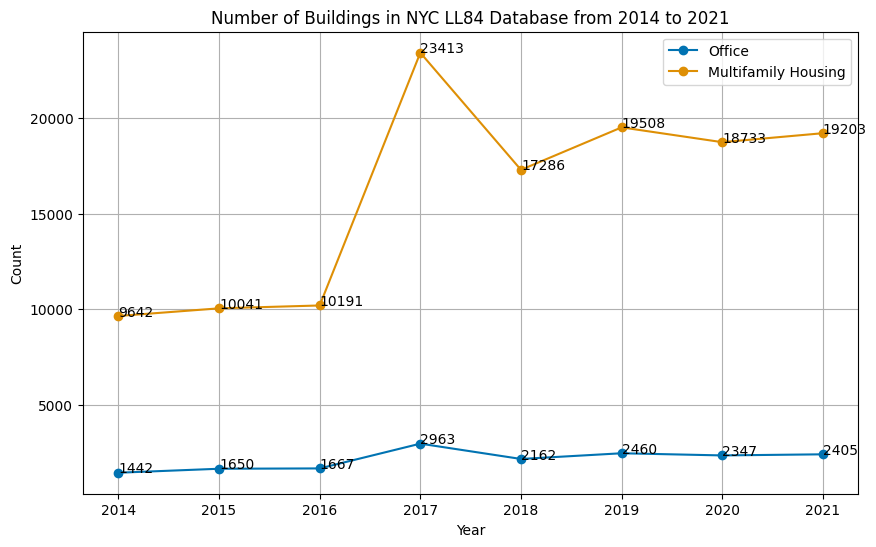

In [832]:
# office buildings
office_2021 = ll84_all_2021[(ll84_all_2021['Primary Property Type - Self Selected'] == 'Office')]
office_2020 = ll84_all_2020[(ll84_all_2020['Primary Property Type - Self Selected'] == 'Office')]
office_2019 = ll84_all_2019[(ll84_all_2019['Primary Property Type - Self Selected'] == 'Office')]
office_2018 = ll84_all_2018[(ll84_all_2018['Primary Property Type - Self Selected'] == 'Office')]
office_2017 = ll84_all_2017[(ll84_all_2017['Primary Property Type - Self Selected'] == 'Office')]
office_2016 = ll84_all_2016[(ll84_all_2016['Primary Property Type - Self Selected'] == 'Office')]
office_2015 = ll84_all_2015[(ll84_all_2015['Primary Property Type - Self Selected'] == 'Office')]
office_2014 = ll84_all_2014[(ll84_all_2014['Primary Property Type - Self Selected'] == 'Office')]
#office_2013 = ll84_all_2013[(ll84_all_2013['Primary Property Type - Self Selected'] == 'Office')]
#office_2012 = ll84_all_2012[(ll84_all_2012['Primary Property Type - Self Selected'] == 'Office')]
#office_2011 = ll84_all_2011[(ll84_all_2011['Primary Property Type - Self Selected'] == 'Office')]

# multi-family buildings
mtfam_2021 = ll84_all_2021[(ll84_all_2021['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2020 = ll84_all_2020[(ll84_all_2020['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2019 = ll84_all_2019[(ll84_all_2019['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2018 = ll84_all_2018[(ll84_all_2018['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2017 = ll84_all_2017[(ll84_all_2017['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2016 = ll84_all_2016[(ll84_all_2016['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2015 = ll84_all_2015[(ll84_all_2015['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2014 = ll84_all_2014[(ll84_all_2014['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
# mtfam_2013 = ll84_all_2013[(ll84_all_2013['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
#mtfam_2012 = ll84_all_2012[(ll84_all_2012['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
#mtfam_2011 = ll84_all_2011[(ll84_all_2011['Primary Property Type - Self Selected'] == 'Multifamily Housing')]

# Count of buildings
count_dict = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Office': [len(office_2014), len(office_2015), len(office_2016), len(office_2017), len(office_2018), len(office_2019), len(office_2020), len(office_2021)],
    'Multifamily': [len(mtfam_2014), len(mtfam_2015), len(mtfam_2016), len(mtfam_2017), len(mtfam_2018), len(mtfam_2019), len(mtfam_2020), len(mtfam_2021)]
}

# Convert dictionary into DataFrame
df_count = pd.DataFrame(count_dict)

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(df_count['Year'], df_count['Office'], marker='o', label='Office')
plt.plot(df_count['Year'], df_count['Multifamily'], marker='o', label='Multifamily Housing')

# Add data labels
for x, y in zip(df_count['Year'], df_count['Office']):
    plt.text(x, y, str(y))

for x, y in zip(df_count['Year'], df_count['Multifamily']):
    plt.text(x, y, str(y))

plt.title('Number of Buildings in NYC LL84 Database from 2014 to 2021')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [833]:
# calculate the sum for 'Office - Gross Floor Area (ft²)'
ll84_all_2021['Office - Gross Floor Area (ft²)'] = pd.to_numeric(ll84_all_2021['Office - Gross Floor Area (ft²)'], errors='coerce')
ll84_all_2021['Office - Gross Floor Area (ft²)'] = ll84_all_2021['Office - Gross Floor Area (ft²)'].fillna(0)
office_gfa_sum = ll84_all_2021['Office - Gross Floor Area (ft²)'].sum()
print(f"Sum of 'Office - Gross Floor Area (ft²)': {office_gfa_sum}")


# multifamily
ll84_all_2021['Multifamily Housing - Gross Floor Area (ft²)'] = pd.to_numeric(ll84_all_2021['Multifamily Housing - Gross Floor Area (ft²)'], errors='coerce')
ll84_all_2021['Multifamily Housing - Gross Floor Area (ft²)'] = ll84_all_2021['Multifamily Housing - Gross Floor Area (ft²)'].fillna(0)
mtfam_gfa_sum = ll84_all_2021['Multifamily Housing - Gross Floor Area (ft²)'].sum()
print(f"Sum of 'Multifamily Housing - Gross Floor Area (ft²)': {mtfam_gfa_sum}")

# calculate the sum for 'Property GFA - Self-Reported (ft²)'
ll84_all_2021['Property GFA - Self-Reported (ft²)'] = pd.to_numeric(ll84_all_2021['Property GFA - Self-Reported (ft²)'], errors='coerce')
ll84_all_2021['Property GFA - Self-Reported (ft²)'] = ll84_all_2021['Property GFA - Self-Reported (ft²)'].fillna(0)
property_gfa_sum = ll84_all_2021['Property GFA - Self-Reported (ft²)'].sum()
print(f"Sum of 'Property GFA - Self-Reported (ft²)': {property_gfa_sum}")

Sum of 'Office - Gross Floor Area (ft²)': 527725901.70000005
Sum of 'Multifamily Housing - Gross Floor Area (ft²)': 2150766206.0
Sum of 'Property GFA - Self-Reported (ft²)': 3710360978.9


In [834]:
# calculate the sum for 'Office - Gross Floor Area (ft²)'
ll84_all_2019['Office - Gross Floor Area (ft²)'] = pd.to_numeric(ll84_all_2019['Office - Gross Floor Area (ft²)'], errors='coerce')
ll84_all_2019['Office - Gross Floor Area (ft²)'] = ll84_all_2019['Office - Gross Floor Area (ft²)'].fillna(0)
office_gfa_sum = ll84_all_2019['Office - Gross Floor Area (ft²)'].sum()
print(f"Sum of 'Office - Gross Floor Area (ft²)': {office_gfa_sum}")


# multifamily
ll84_all_2019['Multifamily Housing - Gross Floor Area (ft²)'] = pd.to_numeric(ll84_all_2019['Multifamily Housing - Gross Floor Area (ft²)'], errors='coerce')
ll84_all_2019['Multifamily Housing - Gross Floor Area (ft²)'] = ll84_all_2019['Multifamily Housing - Gross Floor Area (ft²)'].fillna(0)
mtfam_gfa_sum = ll84_all_2019['Multifamily Housing - Gross Floor Area (ft²)'].sum()
print(f"Sum of 'Multifamily Housing - Gross Floor Area (ft²)': {mtfam_gfa_sum}")

# calculate the sum for 'Property GFA - Self-Reported (ft²)'
ll84_all_2019['Property GFA - Self-Reported (ft²)'] = pd.to_numeric(ll84_all_2019['Property GFA - Self-Reported (ft²)'], errors='coerce')
ll84_all_2019['Property GFA - Self-Reported (ft²)'] = ll84_all_2019['Property GFA - Self-Reported (ft²)'].fillna(0)
property_gfa_sum = ll84_all_2019['Property GFA - Self-Reported (ft²)'].sum()
print(f"Sum of 'Property GFA - Self-Reported (ft²)': {property_gfa_sum}")

Sum of 'Office - Gross Floor Area (ft²)': 562312339.2
Sum of 'Multifamily Housing - Gross Floor Area (ft²)': 1991764427.5
Sum of 'Property GFA - Self-Reported (ft²)': 3593854137.9


In [835]:
# normalize data
# Define the list of dataframes
df_list = [office_2014, office_2015, office_2016, office_2017, office_2018, office_2019, office_2020, office_2021]

for i in range(len(df_list)):
    # Convert 'EUI' column to numeric
    df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce')

    # Calculate IQR
    Q1 = df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'].quantile(0)
    Q3 = df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'].quantile(0.95)
    IQR = Q3 - Q1

    # Define criteria for an observation to be an outlier
    outlier_criteria = ((df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] < (Q1 - 1.5 * IQR)) | (df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] > (Q3 + 1.5 * IQR)))

    # Remove outliers
    df_list[i] = df_list[i][~outlier_criteria]

# Update the original dataframes
office_2014, office_2015, office_2016, office_2017, office_2018, office_2019, office_2020, office_2021 = df_list

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/1739470594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/1739470594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df_list[i]['Weather Normalized Site EUI (kBtu/ft²

In [836]:
# merge offices
# office_2013['Year'] = 2013
# office_2014['Year'] = 2014
# office_2015['Year'] = 2015
# office_2016['Year'] = 2016
office_2017['Year'] = 2017
office_2018['Year'] = 2018
office_2019['Year'] = 2019
office_2020['Year'] = 2020
office_2021['Year'] = 2021

offices = pd.concat([office_2017, office_2018, office_2019, office_2020, office_2021])

# print (offices.head())
# print (offices.shape)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/1591379510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'])


<Figure size 1000x600 with 0 Axes>

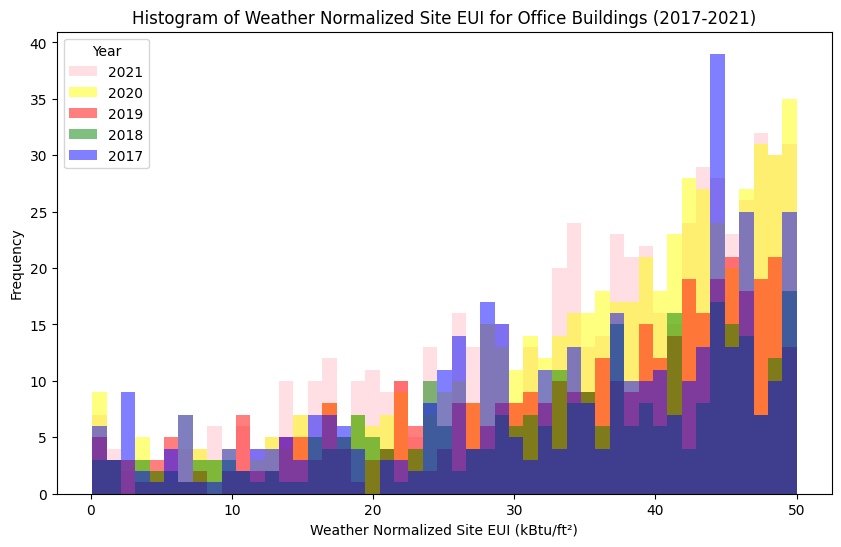

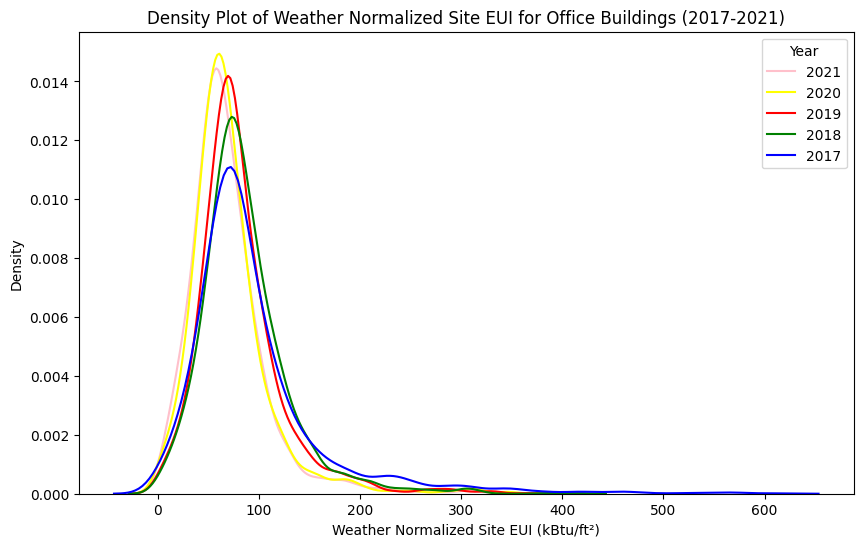

<Figure size 1000x600 with 0 Axes>

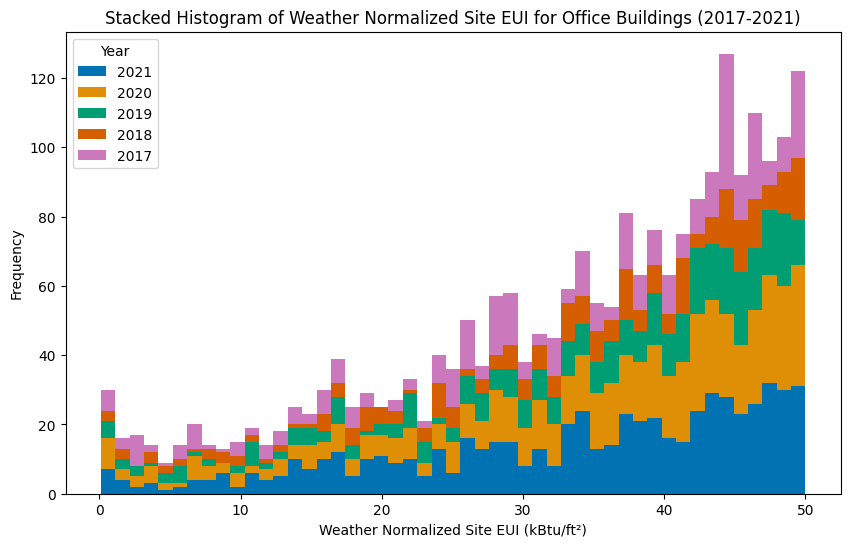

In [837]:
import seaborn as sns

# # Drop rows with NaN values in 'Weather Normalized Site EUI (kBtu/ft²)' column
offices_cleaned = offices.dropna(subset=['Weather Normalized Site EUI (kBtu/ft²)'])
# offices_cleaned = offices_cleaned.drop(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'])
offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'])
offices_cleaned = offices_cleaned[offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'] > 0]

# #offices_cleaned = offices.fillna({'Weather Normalized Site EUI (kBtu/ft²)': '0'})
plt.figure(figsize=(10, 6))

# Define bins for the histogram
bins = np.linspace(min(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'].min(), 
                   offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'].max()), 50)

plt.figure(figsize=(10, 6))

for year, color in zip([2021, 2020, 2019, 2018, 2017], ['pink', 'yellow', 'red', 'green', 'blue']):
    subset = offices_cleaned[offices_cleaned['Year'] == year]
    plt.hist(subset['Weather Normalized Site EUI (kBtu/ft²)'], bins=bins, 
             alpha=0.5, color=color, label=str(year))
    
plt.title('Histogram of Weather Normalized Site EUI for Office Buildings (2017-2021)')
plt.xlabel('Weather Normalized Site EUI (kBtu/ft²)')
plt.ylabel('Frequency')
plt.legend(title='Year')
plt.show()

plt.figure(figsize=(10, 6))

for year, color in zip([2021, 2020, 2019, 2018, 2017], ['pink', 'yellow', 'red', 'green', 'blue']):
    subset = offices_cleaned[offices_cleaned['Year'] == year]
    sns.kdeplot(subset['Weather Normalized Site EUI (kBtu/ft²)'], 
             color=color, label=str(year))

plt.title('Density Plot of Weather Normalized Site EUI for Office Buildings (2017-2021)')
plt.xlabel('Weather Normalized Site EUI (kBtu/ft²)')
plt.ylabel('Density')
plt.legend(title='Year')
plt.show()

plt.figure(figsize=(10, 6))

# We need to build a list of arrays for plt.hist()
# Set color palette
sns.set_palette('colorblind', 5)

plt.figure(figsize=(10, 6))

# We need to build a list of arrays for plt.hist()
data = [offices_cleaned.loc[offices_cleaned['Year'] == year, 'Weather Normalized Site EUI (kBtu/ft²)'] for year in [2021, 2020, 2019, 2018, 2017]]
labels = ['2021', '2020', '2019', '2018', '2017']

# Here plt.hist() will use the color palette set above
plt.hist(data, bins, stacked=True, label=labels)

plt.title('Stacked Histogram of Weather Normalized Site EUI for Office Buildings (2017-2021)')
plt.xlabel('Weather Normalized Site EUI (kBtu/ft²)')
plt.ylabel('Frequency')
plt.legend(title='Year')
plt.show()

In [838]:
# Calculate average 'Weather Normalized Site EUI (kBtu/ft²)' for each year
offices_cleaned = offices.dropna(subset=['Weather Normalized Site EUI (kBtu/ft²)'])
# offices_cleaned = offices.fillna({'Site EUI (kBtu/ft²)': '0'})
offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'])
average_EUI = offices_cleaned.groupby('Year')['Weather Normalized Site EUI (kBtu/ft²)'].mean()

print(average_EUI)

Year
2017    93.453961
2018    85.856463
2019    81.030731
2020    70.559877
2021    68.815036
Name: Weather Normalized Site EUI (kBtu/ft²), dtype: float64


/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/3404158889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'])


/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/4181806463.py:18: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_long = df_concat.melt(id_vars=['Property Id', 'Year'], value_vars=['Weather Normalized Site EUI (kBtu/ft²)'], var_name='Variable', value_name='Weather Normalized Site EUI (kBtu/ft²)')


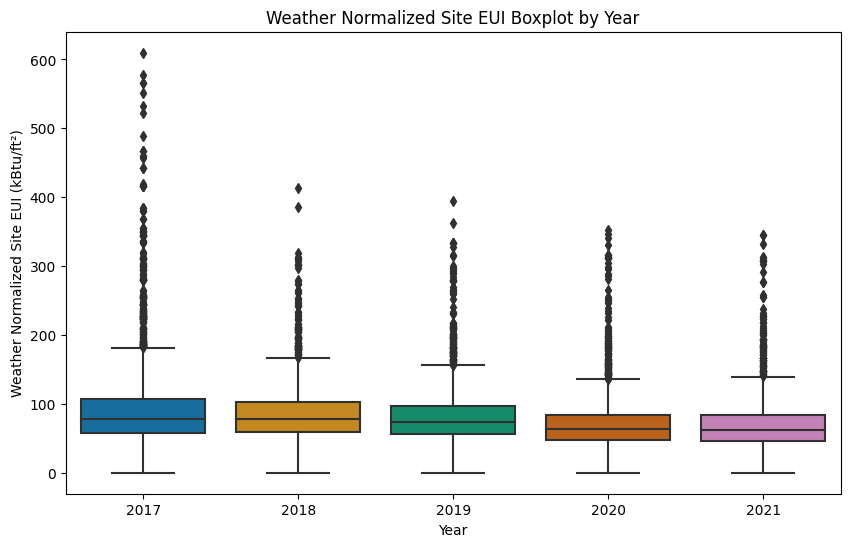

In [839]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of dataframes and corresponding years
df_list = [office_2017, office_2018, office_2019, office_2020, office_2021]
years = ['2017', '2018', '2019', '2020', '2021']

# Add a 'Year' column to each dataframe and ensure 'EUI' column is numeric
for i in range(len(df_list)):
    df_list[i]['Year'] = years[i]
    df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce')

# Concatenate all dataframes into one
df_concat = pd.concat(df_list)

# Reshape the dataframe to long format
df_long = df_concat.melt(id_vars=['Property Id', 'Year'], value_vars=['Weather Normalized Site EUI (kBtu/ft²)'], var_name='Variable', value_name='Weather Normalized Site EUI (kBtu/ft²)')

# Remove any rows with NaN in 'EUI' column
df_long = df_long.dropna(subset=['Weather Normalized Site EUI (kBtu/ft²)'])

sns.set_palette('colorblind', 5)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Weather Normalized Site EUI (kBtu/ft²)', data=df_long)
plt.title('Weather Normalized Site EUI Boxplot by Year')
plt.show()




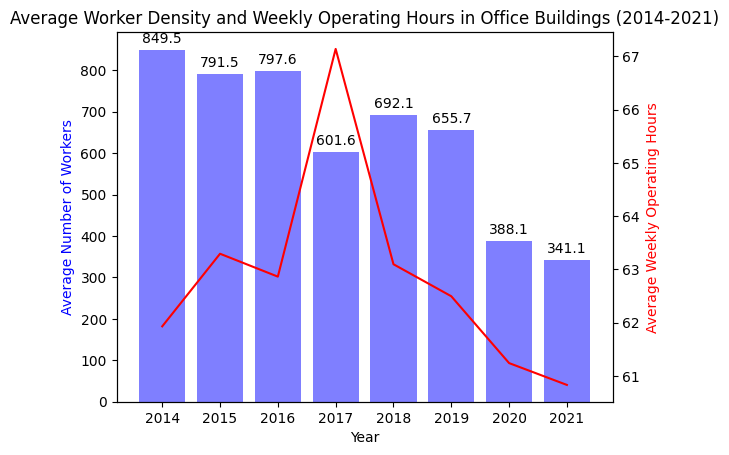

In [869]:
# List of your dataframes and corresponding years
dfs = [office_2014, office_2015, office_2016, office_2017, office_2018, office_2019, office_2020, office_2021]
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Calculate the averages
density_avgs = [pd.to_numeric(df['Office - Number of Workers on Main Shift'], errors='coerce').mean() for df in dfs]
hours_avgs = [pd.to_numeric(df['Office - Weekly Operating Hours'], errors='coerce').mean() for df in dfs]

# Create a figure and a plot
fig, ax1 = plt.subplots()

# Bar plot for Worker Density
bars = ax1.bar(years, density_avgs, color='b', alpha=0.5)
# ax1.bar(years, density_avgs, color='b', alpha=0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Number of Workers', color='b')

# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')
    
# Create a second y-axis for the Weekly Operating Hours
ax2 = ax1.twinx()

# Line plot for Weekly Operating Hours
ax2.plot(years, hours_avgs, color='r')
ax2.set_ylabel('Average Weekly Operating Hours', color='r')

plt.title('Average Worker Density and Weekly Operating Hours in Office Buildings (2014-2021)')
plt.show()

In [841]:
from functools import reduce

# Let's assume the dfs are named as office_2021, office_2020, ..., office_2013
all_office_dfs = [office_2021, office_2020, office_2019, office_2018, office_2017]

# To avoid overlapping column names, rename EUI column in each df and keep only necessary columns
for i in range(len(all_office_dfs)):
    year = 2021 - i  # starting from 2021
    all_office_dfs[i] = all_office_dfs[i][['Property Id', 'Weather Normalized Site EUI (kBtu/ft²)']].rename(columns={'Weather Normalized Site EUI (kBtu/ft²)': f'EUI_{year}'})

# Use reduce to merge all dfs
office_merged = reduce(lambda left,right: pd.merge(left,right,on='Property Id'), all_office_dfs)

# Create the baseline_EUI column as mean of EUI from 2013 to 2019
EUI_cols = [f'EUI_{year}' for year in range(2017, 2020)]  # columns to consider for mean
office_merged['baseline_EUI'] = office_merged[EUI_cols].mean(axis=1)

print(office_merged.head())
print(office_merged.shape)

   Property Id  EUI_2021  EUI_2020  EUI_2019  EUI_2018  EUI_2017  baseline_EUI
0      2665508      60.6       NaN      71.5      76.5      86.3     78.100000
1      2665536      77.7      85.2     150.4     154.3     139.9    148.200000
2      2665629      67.0      67.1      74.1      95.8      92.4     87.433333
3      4038387       NaN      91.5     109.4     120.9      72.4    100.900000
4      4038387       NaN      91.5     109.4     120.9      72.4    100.900000
(1919, 7)


In [842]:
# # Calculate the difference in 'Weather Normalized Site EUI (kBtu/ft²)' for each building
# Convert the EUI columns to numeric
office_merged['EUI_2021'] = pd.to_numeric(office_merged['EUI_2021'], errors='coerce')
office_merged['EUI_2020'] = pd.to_numeric(office_merged['EUI_2020'], errors='coerce')
office_merged['baseline_EUI'] = pd.to_numeric(office_merged['baseline_EUI'], errors='coerce')

# Now calculate the differences
office_merged['EUI_diff_2021_2020'] = office_merged['EUI_2021'] - office_merged['EUI_2020']
office_merged['EUI_diff_2021_baseline'] = office_merged['EUI_2021'] - office_merged['baseline_EUI']
office_merged['EUI_diff_2020_baseline'] = office_merged['EUI_2020'] - office_merged['baseline_EUI']

print(office_merged['EUI_diff_2021_2020'].mean())
print(office_merged['EUI_diff_2021_baseline'].mean())
print(office_merged['EUI_diff_2020_baseline'].mean())
print(office_merged['baseline_EUI'].mean())

office_ll84 = pd.merge(office_2021, office_merged, on='Property Id', how='left')

print(office_ll84.head())
print(office_2021.shape)
print(office_ll84.shape)

-0.9032258064516132
-13.019797421731123
-11.829592039800994
82.94890410958904
   Property Id                      Property Name  \
0      2665508       Stellar - 44-50 West 28th St   
1      2665536  Stellar - 119-21 West 23rd Street   
2      2665629       Stellar - 32-02 Skillman Ave   
3      4038387        Stellar - 233 Spring Street   
4      4038387        Stellar - 233 Spring Street   

                    Parent Property Id                 Parent Property Name  \
0  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
1  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
2  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
3  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
4  Not Applicable: Standalone Property  Not Applicable: Standalone Property   

  Year Ending NYC Borough, Block and Lot (BBL)  \
0  12/31/2021                     1-00829-0068   
1  12/31/2021               

In [843]:
pluto = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/PLUTO/Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv', na_values='')

# change BBL to numeric
office_ll84['NYC Borough, Block and Lot (BBL)'] = office_ll84['NYC Borough, Block and Lot (BBL)'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# merge pluto and ll84 data on BBL
office_pluto = pd.merge(office_ll84, pluto, how='inner', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')

print(office_pluto.shape)
print(list(office_pluto.columns))

office_pluto.to_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/office_pluto.csv', index=False)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/443369919.py:1: DtypeWarning: Columns (17,18,20,22,24,25,52,62) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/PLUTO/Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv', na_values='')


(1692, 360)
['Property Id', 'Property Name', 'Parent Property Id', 'Parent Property Name', 'Year Ending', 'NYC Borough, Block and Lot (BBL)', 'NYC Building Identification Number (BIN)', 'Address 1', 'City', 'Postal Code', 'Primary Property Type - Self Selected', 'Primary Property Type - Portfolio Manager-Calculated', 'National Median Reference Property Type', 'List of All Property Use Types at Property', 'Largest Property Use Type', 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Construction Status', 'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)', 'Metered Areas (Water)', 'ENERGY STAR Score', 'National Median ENERGY STAR Score', 'Target ENERGY STAR Score', 'Reason(s) for No Score', 'ENERGY STAR Certification - Year(s) Certified (Score)', 'ENERGY STAR Certification - Eligibilit

- Annual Maximum Demand (kW)
- Office - Worker Density (Number per 1,000 sq ft)
- Office - Number of Workers on Main Shift
- Office - Weekly Operating Hours

- Building Square Footage – Total building area as reported in PM
- Building Age – Age of building based on year built from PLUTO database (new variable)
- Number of Floors – Total number of floors in building from PLUTO database
- FAR – As-built floor area ratio from PLUTO database

- Lot Coverage – building footprint divided by lot area from PLUTO database. Building footprint approximated by multiplying building width by building depth (new variable)
- Lot Location – a binary variable for whether the building is an inside lot or corner lot (based on variable from the PLUTO database)
- Detached Building - a binary variable for whether the building is detached or attached to adjacent buildings (based on variable from the PLUTO database)

- Primary Energy Source – a binary variable equal to 1 for the dominant fuel type in the building, and equal to 0 otherwise (new variable)
- % non-Primary Space Type – percentage of non-primary space type (e.g. percentage of retail in a building with a majority office space) (new variable)

For Office buildings, the following variables are added to the base model:
- Office Worker Density – Number of employees per 1,000 square feet (default value = 2.3)
- Office Weekly Operating Hours – number of hours per week that a building is occupied by at least 75% of the tenant employees (default value = 65 hours per week)

In [844]:

# Drop rows where 'Weather Normalized Site EUI (kBtu/ft²)' is empty (NaN)
# office_pluto = office_pluto.dropna(subset=['Weather Normalized Site EUI (kBtu/ft²)'])
# print(office_pluto.shape)

office_model_raw = office_pluto[[
    # building info
    'Property Id',
    'Property Name',
    'Longitude',
    'Latitude',
    
    'Year Built',
    'Office - Worker Density (Number per 1,000 sq ft)',
    'Office - Weekly Operating Hours',
    
    
    'ENERGY STAR Score',
    'Annual Maximum Demand (kW)',
    
    '2nd Largest Property Use Type',
    '2nd Largest Property Use - Gross Floor Area (ft²)',
    'Parking - Gross Floor Area (ft²)',
    'Restaurant - Gross Floor Area (ft²)',
    
    
    # from pluto
    'numbldgs',
    'bldgarea',
    'comarea',
    'resarea',
    'officearea',
    'retailarea',
    'garagearea',
    'strgearea', # storage area
    'factryarea',
    'otherarea',
    'numfloors',
    'bldgfront', 
    'bldgdepth',
    'proxcode', # PROXIMITY CODE  0 - Not available 1 - Detached 2 - Semi-attached 3 - Attached
    'bsmtcode',# basement
    'builtfar', # floor area ratio 
    'assesstot',
    
    'Weather Normalized Site EUI (kBtu/ft²)',
    'EUI_2021',
    'EUI_2020',
    'EUI_2019',
    'EUI_2018',
    'baseline_EUI',
    'EUI_diff_2021_2020',
    'EUI_diff_2021_baseline',
    'EUI_diff_2020_baseline'
]].copy()

In [845]:
# filter out more than one building lot
office_model_filtered = office_model_raw[office_model_raw['numbldgs'] > 1]


In [846]:
# new variables
office_model_raw['Building Age'] = 2023 - office_model_raw['Year Built']
office_model_raw['building Coverage'] = office_model_raw['bldgfront'] * office_model_raw['bldgdepth']
office_model_raw['front depth ratio'] = office_model_raw['bldgdepth'] / office_model_raw['bldgfront']
office_model_raw['Non-primary gross area'] = office_model_raw['comarea'] + office_model_raw['resarea'] + office_model_raw['retailarea'] + office_model_raw['garagearea'] + office_model_raw['strgearea'] + office_model_raw['factryarea'] + office_model_raw['otherarea'] 
office_model_raw['Non-primary gross area'] = office_model_raw['Non-primary gross area'].fillna(0)
office_model_raw['% Non-primary gross area'] = office_model_raw['Non-primary gross area'] / office_model_raw['bldgarea']
office_model_raw['mix-used'] = np.where(office_model_raw['Non-primary gross area'] != 0, 1, 0)

office_model_raw['pct_comarea'] = office_model_raw['comarea'] / office_model_raw['bldgarea']
office_model_raw['pct_resarea'] = office_model_raw['resarea'] / office_model_raw['bldgarea']
office_model_raw['pct_officearea'] = office_model_raw['officearea'] / office_model_raw['bldgarea']
office_model_raw['pct_retailarea'] = office_model_raw['retailarea'] / office_model_raw['bldgarea']
office_model_raw['pct_garagearea'] = office_model_raw['garagearea'] / office_model_raw['bldgarea']
office_model_raw['pct_strgearea'] = office_model_raw['strgearea'] / office_model_raw['bldgarea']
office_model_raw['pct_factryarea'] = office_model_raw['factryarea'] / office_model_raw['bldgarea']

In [847]:

office_model= office_model_raw[[
    # building info
    'Property Id',
    'Property Name',
    'Longitude',
    'Latitude',
    
    'Building Age',
    'Office - Worker Density (Number per 1,000 sq ft)',
    'Office - Weekly Operating Hours',
    
    
    'ENERGY STAR Score',
    # 'Annual Maximum Demand (kW)',
    
    # 'mix-used',
    # '% Non-primary gross area',
    
    # from pluto
    # 'bldgarea',
    'pct_comarea',
    'pct_resarea',
    # 'pct_officearea',
    'pct_retailarea',
    # 'pct_garagearea',
    # 'pct_strgearea', # storage area
    'pct_factryarea',
    # 'otherarea',
    'numfloors',
    # 'bldgfront', 
    # 'bldgdepth',
    'proxcode', # PROXIMITY CODE  0 - Not available 1 - Detached 2 - Semi-attached 3 - Attached
    # 'bsmtcode',# basement
    'builtfar', # floor area ratio 
    'building Coverage',
    'front depth ratio',
    # 'assesstot',
    
    'Weather Normalized Site EUI (kBtu/ft²)',
    # 'EUI_2021',
    # 'EUI_2020',
    # 'EUI_2019',
    # 'EUI_2018',
    # 'baseline_EUI',
    # 'EUI_diff_2021_2020',
    # 'EUI_diff_2021_baseline',
    # 'EUI_diff_2020_baseline'
]].copy()

In [848]:
print(office_model['Building Age'].describe())
# office_model['Building Age Code'] = office_model['Building Age'].apply(lambda x: 1 if x <= 10 else (2 if x <= 30 else (3 if x <= 60 else (4 if x <= 100 else 5))))
office_model['Building Age Code'] = office_model['Building Age'].apply(lambda x: 1 if x <= 30 else (2 if x <= 60 else (3 if x <= 90 else 4)))
# office_model['Building Age Code'] = office_model['Building Age'].apply(lambda x: 1 if x <= 60 else (2 if x <= 90 else 3 ))
office_model = office_model.drop(['Building Age'], axis=1)

count    1692.000000
mean       82.602246
std        34.108771
min         2.000000
25%        58.000000
50%        95.000000
75%       109.000000
max       208.000000
Name: Building Age, dtype: float64


In [849]:
print(office_model['numfloors'].describe())
# office_model['numfloors code'] = office_model['numfloors'].apply(lambda x: 1 if x <= 10 else (2 if x <= 40 else 3))
office_model['numfloors code'] = office_model['numfloors'].apply(lambda x: 1 if x <= 10 else (2 if x <= 20 else (3 if x <= 40 else 4)))
office_model = office_model.drop(['numfloors'], axis=1)

count    1644.000000
mean       13.431113
std        12.029996
min         1.000000
25%         5.000000
50%        10.000000
75%        18.000000
max        68.000000
Name: numfloors, dtype: float64


In [850]:
office_model['proxcode_detached'] = office_model['proxcode'].apply(lambda x: 1 if (x == 1 or x == 2) else 0)
office_model = office_model.drop(['proxcode'], axis=1)

In [851]:
cols_to_convert = [
    'Office - Worker Density (Number per 1,000 sq ft)', 
    'Office - Weekly Operating Hours',
                'ENERGY STAR Score',
                   'Building Age Code',
                   'numfloors code',
                #    'mix-used'
                #    'Annual Maximum Demand (kW)'
                   ]

for col in cols_to_convert:
    office_model[col] = pd.to_numeric(office_model[col], errors='coerce')
    
office_model = office_model.replace([np.inf, -np.inf], np.nan)
office_model = office_model.dropna(how="any") # drops row if any NA values are present

# If a column is categorical (like 'proxcode' seems to be), you can use one-hot encoding:
office_model = pd.get_dummies(office_model, columns=['proxcode_detached'], drop_first=True)
office_model = pd.get_dummies(office_model, columns=['Building Age Code', 'numfloors code'], drop_first=False)

print(office_model.dtypes)

Property Id                                           int64
Property Name                                        object
Longitude                                           float64
Latitude                                            float64
Office - Worker Density (Number per 1,000 sq ft)    float64
Office - Weekly Operating Hours                     float64
ENERGY STAR Score                                   float64
pct_comarea                                         float64
pct_resarea                                         float64
pct_retailarea                                      float64
pct_factryarea                                      float64
builtfar                                            float64
building Coverage                                   float64
front depth ratio                                   float64
Weather Normalized Site EUI (kBtu/ft²)              float64
proxcode_detached_1                                   uint8
Building Age Code_1                     

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/2167618580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  office_matrix = office_model.corr()


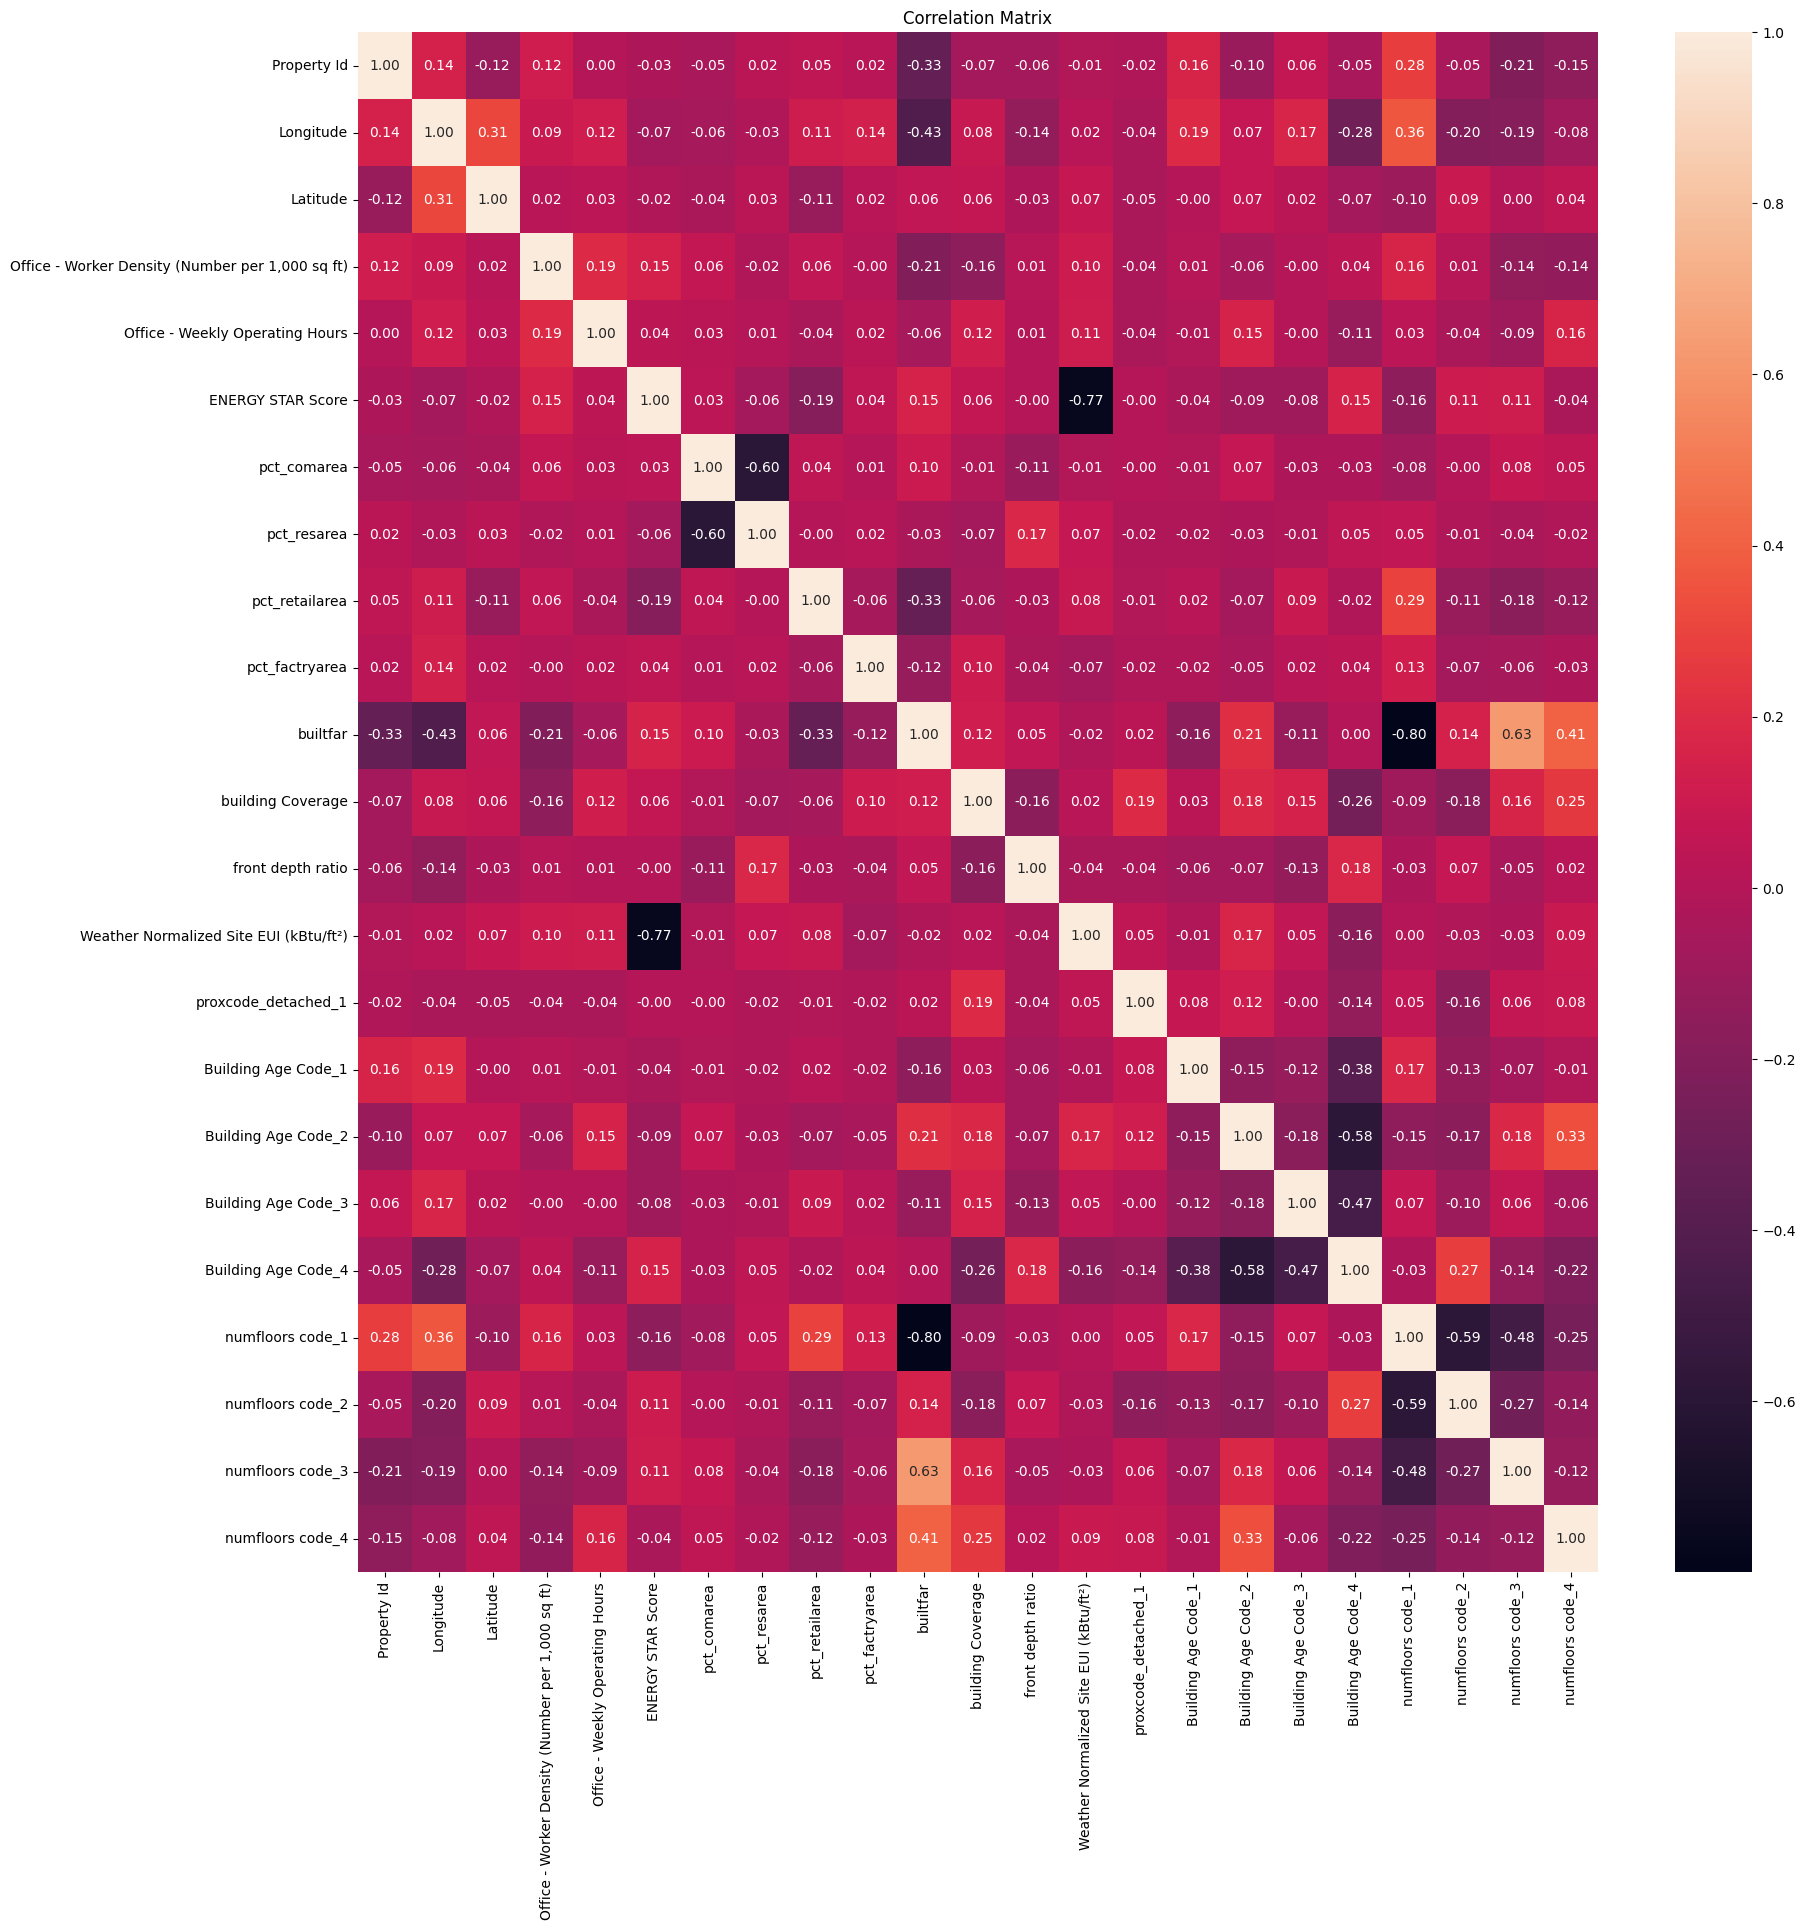

Weather Normalized Site EUI (kBtu/ft²)              1.000000
Building Age Code_2                                 0.167047
Office - Weekly Operating Hours                     0.113736
Office - Worker Density (Number per 1,000 sq ft)    0.102287
numfloors code_4                                    0.087287
pct_retailarea                                      0.084983
Latitude                                            0.073168
pct_resarea                                         0.065258
Building Age Code_3                                 0.053976
proxcode_detached_1                                 0.050375
Longitude                                           0.020208
building Coverage                                   0.018151
numfloors code_1                                    0.003463
pct_comarea                                        -0.007091
Property Id                                        -0.011711
Building Age Code_1                                -0.013528
builtfar                

In [852]:
# create a correlation matrix
office_matrix = office_model.corr()
# print(office_matrix)


# plot a heatmap to visualize the correlations
plt.figure(figsize=(20, 20))
sns.heatmap(office_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

print(office_matrix['Weather Normalized Site EUI (kBtu/ft²)'].sort_values(ascending=False))

In [853]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# # Handle missing data
# office_model = office_model.fillna(office_model.mean())

# feature_cols = [
#     'Building Age Code_1',
#     'Building Age Code_2',
#     'Building Age Code_3',
#     'Building Age Code_4',
    
#     'Office - Worker Density (Number per 1,000 sq ft)',
#     'Office - Weekly Operating Hours',
    
    
#     'ENERGY STAR Score',
#     'pct_comarea',
#     'pct_resarea',
#     'pct_retailarea',
#     'pct_factryarea',
    
#     'numfloors code_1',
#     'numfloors code_2',
#     'numfloors code_3',
#     'numfloors code_4',
    
#     'proxcode_detached_1', # PROXIMITY CODE  0 - Not available 1 - Detached 2 - Semi-attached 3 - Attached
#     'builtfar', # floor area ratio 
#     'building Coverage',
#     'front depth ratio',
# ]

# # Separate your target variable and features
# X = office_model[feature_cols]
# y = office_model['Weather Normalized Site EUI (kBtu/ft²)']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the model
# lm = LinearRegression()

# # Fit the model on the training data
# lm.fit(X_train, y_train)

# # Predict on the test data
# y_pred = lm.predict(X_test)

# # Print out the coefficients of the model
# coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
# print(coeff_df)

# # Check the quality of the model using some common metrics
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [854]:
import pandas as pd
import statsmodels.api as sm

# Handle missing data
office_model = office_model.fillna(office_model.mean())

feature_cols = [
    'Building Age Code_1',
    'Building Age Code_2',
    'Building Age Code_3',
    'Building Age Code_4',
    
    'Office - Worker Density (Number per 1,000 sq ft)',
    'Office - Weekly Operating Hours',
    
    
    'ENERGY STAR Score',
    'pct_comarea',
    'pct_resarea',
    'pct_retailarea',
    'pct_factryarea',
    
    'numfloors code_1',
    'numfloors code_2',
    'numfloors code_3',
    'numfloors code_4',
    
    'proxcode_detached_1', # PROXIMITY CODE  0 - Not available 1 - Detached 2 - Semi-attached 3 - Attached
    'builtfar', # floor area ratio 
    'building Coverage',
    'front depth ratio',
]

# Separate your target variable and features
X = office_model[feature_cols]
y = office_model['Weather Normalized Site EUI (kBtu/ft²)']

# Add a constant to the X variable
# This is a requirement for the statsmodel library to work correctly, since it does not add it by default like scikit-learn does
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = sm.OLS(y_train, X_train)

# Fit the model on the training data
results = model.fit()

# Print out the statistics
print(results.summary())

# Predict on the test data
y_pred = results.predict(X_test)

# Check the quality of the model using some common metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


                                      OLS Regression Results                                      
Dep. Variable:     Weather Normalized Site EUI (kBtu/ft²)   R-squared:                       0.706
Model:                                                OLS   Adj. R-squared:                  0.700
Method:                                     Least Squares   F-statistic:                     138.0
Date:                                    Mon, 17 Jul 2023   Prob (F-statistic):          1.03e-245
Time:                                            13:00:50   Log-Likelihood:                -4436.0
No. Observations:                                     997   AIC:                             8908.
Df Residuals:                                         979   BIC:                             8996.
Df Model:                                              17                                         
Covariance Type:                                nonrobust                                         
          

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/3307990703.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  office_model = office_model.fillna(office_model.mean())


In [855]:
office_predict = office_model.copy()

### No change
# Create a new column 'hours_plus10' by increasing 'Office - Weekly Operating Hours' by 10%
office_predict['density_nochange'] = office_model['Office - Worker Density (Number per 1,000 sq ft)']

# Create an empty column 'hours_plus10_eui'
office_predict['density_nochange_eui'] = pd.np.nan

# Create a copy of the X_test DataFrame
X_new = X_test.copy()

# Replace the 'Office - Weekly Operating Hours' column with the new values from 'hours_plus10'
X_new['Office - Worker Density (Number per 1,000 sq ft)'] = office_predict.loc[X_test.index, 'density_nochange']

# Use the model to make predictions based on the new operating hours
office_predict.loc[X_test.index, 'density_nochange_eui'] = results.predict(X_new)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/1386643110.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  office_predict['density_nochange_eui'] = pd.np.nan


In [856]:
# predict EUI with 10% increased operating hours

# Create a new column 'hours_plus10' by increasing 'Office - Weekly Operating Hours' by 10%
office_predict['density_plus10'] = office_model['Office - Worker Density (Number per 1,000 sq ft)'] * 1.10

# Create an empty column 'hours_plus10_eui'
office_predict['density_plus10_eui'] = pd.np.nan

# Create a copy of the X_test DataFrame
X_new = X_test.copy()

# Replace the 'Office - Weekly Operating Hours' column with the new values from 'hours_plus10'
X_new['Office - Worker Density (Number per 1,000 sq ft)'] = office_predict.loc[X_test.index, 'density_plus10']

# Use the model to make predictions based on the new operating hours
office_predict.loc[X_test.index, 'density_plus10_eui'] = results.predict(X_new)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/748396174.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  office_predict['density_plus10_eui'] = pd.np.nan


In [857]:
# increase operating hours by 20%

# Create the 'hours_plus20' column in office_predict
office_predict['density_plus20'] = office_model['Office - Worker Density (Number per 1,000 sq ft)'] * 1.20

# Create an empty column 'hours_plus20_eui'
office_predict['density_plus20_eui'] = np.nan

# Create a copy of the X_test DataFrame
X_new = X_test.copy()

# Replace the 'Office - Weekly Operating Hours' column with the new values from 'hours_plus20'
X_new['Office - Weekly Operating Hours'] = office_predict.loc[X_test.index, 'density_plus20']

# Use the model to make predictions based on the new operating hours
office_predict.loc[X_test.index, 'density_plus20_eui'] = results.predict(X_new)

In [858]:
# predict EUI with 10% decreased operating hours

# Create a new column 'hours_plus10' by increasing 'Office - Weekly Operating Hours' by 10%
office_predict['density_minus10'] = office_model['Office - Worker Density (Number per 1,000 sq ft)'] * 0.9

# Create an empty column 'hours_plus10_eui'
office_predict['density_minus10_eui'] = pd.np.nan

# Create a copy of the X_test DataFrame
X_new = X_test.copy()

# Replace the 'Office - Weekly Operating Hours' column with the new values from 'hours_plus10'
X_new['Office - Worker Density (Number per 1,000 sq ft)'] = office_predict.loc[X_test.index, 'density_minus10']

# Use the model to make predictions based on the new operating hours
office_predict.loc[X_test.index, 'density_minus10_eui'] = results.predict(X_new)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_1046/4179022952.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  office_predict['density_minus10_eui'] = pd.np.nan


In [860]:
# Calculate the mean of specific columns
mean_values = office_predict[['density_minus20_eui', 'density_minus10_eui', 'density_nochange_eui', 'density_plus10_eui', 'density_plus20_eui']].mean()

# Print the mean values
print(mean_values)


density_minus20_eui     69.037799
density_minus10_eui     66.458698
density_nochange_eui    67.748249
density_plus10_eui      69.037799
density_plus20_eui      55.479956
dtype: float64


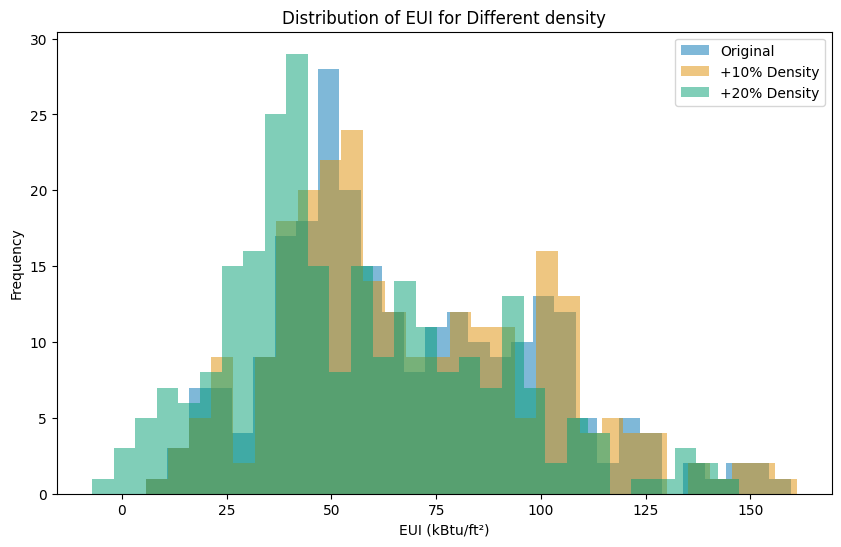

In [861]:
plt.figure(figsize=(10, 6))

# Plot histogram for original EUI
plt.hist(office_predict['density_nochange_eui'], bins=30, alpha=0.5, label='Original')

# Plot histogram for EUI with +10% operating hours
plt.hist(office_predict['density_plus10_eui'], bins=30, alpha=0.5, label='+10% Density')

# Plot histogram for EUI with +20% operating hours
plt.hist(office_predict['density_plus20_eui'], bins=30, alpha=0.5, label='+20% Density')

# Add labels, title, and legend
plt.xlabel('EUI (kBtu/ft²)')
plt.ylabel('Frequency')
plt.title('Distribution of EUI for Different density')
plt.legend()

# Show the plot
plt.show()

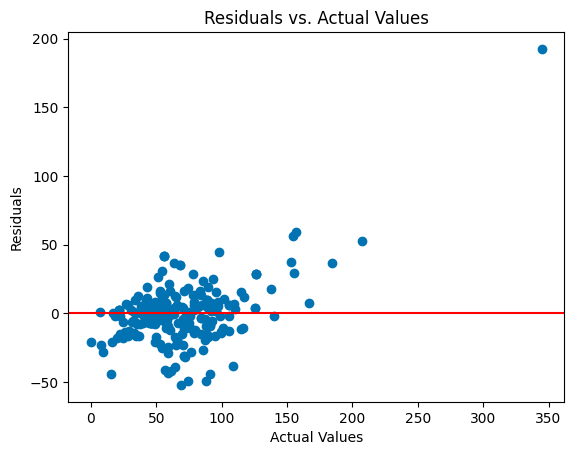

In [862]:
# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of the residuals
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-') # This line indicates where residuals would be 0
plt.title('Residuals vs. Actual Values')
plt.show()

In [863]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Handle missing data
# office_model = office_model.fillna(office_model.mean())

# feature_cols = [
#     'Building Age Code_1',
#     'Building Age Code_2',
#     'Building Age Code_3',
#     'Building Age Code_4',
    
#     'Office - Worker Density (Number per 1,000 sq ft)',
#     'Office - Weekly Operating Hours',
    
    
#     'ENERGY STAR Score',
#     'pct_comarea',
#     'pct_resarea',
#     'pct_retailarea',
#     'pct_factryarea',
    
#     'numfloors code_1',
#     'numfloors code_2',
#     'numfloors code_3',
#     'numfloors code_4',
    
#     'proxcode_detached_1', # PROXIMITY CODE  0 - Not available 1 - Detached 2 - Semi-attached 3 - Attached
#     'builtfar', # floor area ratio 
#     'building Coverage',
#     'front depth ratio',

#     'Weather Normalized Site EUI (kBtu/ft²)',
# ]

# # Separate your target variable and features
# X = office_model[feature_cols]
# y = office_model['Weather Normalized Site EUI (kBtu/ft²)']

# # Split the data into training and testing sets[[']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)

# # Fit the model on the training data
# rf.fit(X_train, y_train)

# # Use the model to predict the test set results
# y_pred = rf.predict(X_test)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# # Calculate Model Accuracy
# r_sqr = rf.score(X_test, y_test)

# print(f'R square: {r_sqr}')
# print(f'Root Mean Squared Error: {rmse}')

In [864]:
# # Calculate residuals
# residuals = y_test - y_pred

# # Create a scatter plot of the residuals
# plt.scatter(y_test, residuals)
# plt.xlabel('Actual Values')
# plt.ylabel('Residuals')
# plt.axhline(y=0, color='r', linestyle='-') # This line indicates where residuals would be 0
# plt.title('Residuals vs. Actual Values')
# plt.show()